<a href="https://colab.research.google.com/github/MounicaSrinivasan163/Electric_Vehicle_Population_Analysis/blob/main/Electric_Vehicle_Population_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Reading

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Electric_Vehicle_Population_Data.csv", low_memory=False)
print(df.shape)  # should show (200000, columns)
print("Number of rows loaded:", len(df))


(247344, 17)
Number of rows loaded: 247344


In [ ]:
print(df.shape)  # (rows, columns)


(247344, 17)


In [ ]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247344 entries, 0 to 247343
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         247344 non-null  object 
 1   County                                             247340 non-null  object 
 2   City                                               247340 non-null  object 
 3   State                                              247344 non-null  object 
 4   Postal Code                                        247340 non-null  float64
 5   Model Year                                         247344 non-null  int64  
 6   Make                                               247344 non-null  object 
 7   Model                                              247344 non-null  object 
 8   Electric Vehicle Type                              247344 non-null  object

In [ ]:
df = df.drop('Vehicle Location', axis=1)


In [ ]:
df["VIN (1-10)"].nunique()

14792

In [ ]:
for col in df.columns[df.dtypes == 'object']:
    print(col)
    print(df[col].dropna().nunique())
    print(sorted(df[col].dropna().unique()))
    print("***********************************")


VIN (1-10)
14792
['1C4JJXN60P', '1C4JJXN61P', '1C4JJXN62P', '1C4JJXN63P', '1C4JJXN64P', '1C4JJXN65P', '1C4JJXN66P', '1C4JJXN67P', '1C4JJXN68P', '1C4JJXN69P', '1C4JJXN6XP', '1C4JJXP60M', '1C4JJXP60N', '1C4JJXP60P', '1C4JJXP61M', '1C4JJXP61N', '1C4JJXP61P', '1C4JJXP62M', '1C4JJXP62N', '1C4JJXP62P', '1C4JJXP63M', '1C4JJXP63N', '1C4JJXP63P', '1C4JJXP64M', '1C4JJXP64N', '1C4JJXP64P', '1C4JJXP65M', '1C4JJXP65N', '1C4JJXP65P', '1C4JJXP66M', '1C4JJXP66N', '1C4JJXP66P', '1C4JJXP67M', '1C4JJXP67N', '1C4JJXP67P', '1C4JJXP68M', '1C4JJXP68N', '1C4JJXP68P', '1C4JJXP69M', '1C4JJXP69N', '1C4JJXP69P', '1C4JJXP6XM', '1C4JJXP6XN', '1C4JJXP6XP', '1C4JJXR60M', '1C4JJXR60N', '1C4JJXR60P', '1C4JJXR61M', '1C4JJXR61N', '1C4JJXR61P', '1C4JJXR62M', '1C4JJXR62N', '1C4JJXR62P', '1C4JJXR63M', '1C4JJXR63N', '1C4JJXR63P', '1C4JJXR64M', '1C4JJXR64N', '1C4JJXR64P', '1C4JJXR65M', '1C4JJXR65N', '1C4JJXR65P', '1C4JJXR66M', '1C4JJXR66N', '1C4JJXR66P', '1C4JJXR67M', '1C4JJXR67N', '1C4JJXR67P', '1C4JJXR68M', '1C4JJXR68N', '1

In [ ]:
df[df.select_dtypes(include='object').columns].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247344 entries, 0 to 247343
Data columns (total 9 columns):
 #   Column                                             Non-Null Count   Dtype 
---  ------                                             --------------   ----- 
 0   VIN (1-10)                                         247344 non-null  object
 1   County                                             247340 non-null  object
 2   City                                               247340 non-null  object
 3   State                                              247344 non-null  object
 4   Make                                               247344 non-null  object
 5   Model                                              247344 non-null  object
 6   Electric Vehicle Type                              247344 non-null  object
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  247344 non-null  object
 8   Electric Utility                                   247340 non-null  object
dtypes: ob

# Data Preprocessing

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,4
City,4
State,0
Postal Code,4
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
df[df.isnull().any(axis=1)]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract
354,5YJXCAE24H,NaN,NaN,BC,NaN,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200.0,0.0,NaN,159850029,NaN,NaN
8502,WP0AH2YA6S,Kitsap,Poulsbo,WA,98370.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,23.0,277679979,PUGET SOUND ENERGY INC,5.303594e+10
14657,ZHWUC1ZM5S,King,Seattle,WA,98125.0,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,46.0,282538896,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
43618,ZHWUC1ZM3S,King,Mercer Island,WA,98040.0,2025,LAMBORGHINI,REVUELTO,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,41.0,279110842,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
44646,WP0AE2YA6S,King,Seattle,WA,98121.0,2025,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,NaN,NaN,36.0,277367618,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247105,1C4JJXP68N,Charlottesville,Charlottesville,VA,22901.0,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,NaN,241609406,NON WASHINGTON STATE ELECTRIC UTILITY,5.154000e+10
247154,1C4JJXP69P,Harnett,Cameron,NC,28326.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,NaN,244964681,NON WASHINGTON STATE ELECTRIC UTILITY,3.708507e+10
247244,2C4RC1N72L,Douglas,Parker,CO,80134.0,2020,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32.0,0.0,NaN,117949415,NON WASHINGTON STATE ELECTRIC UTILITY,8.035014e+09
247256,5YJ3E1EB2K,Suffolk,Hyde Park,MA,2136.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,NaN,154989264,NON WASHINGTON STATE ELECTRIC UTILITY,2.502514e+10


In [ ]:
df=df.dropna() #since there is no apt logic to fill the null values,they are being dropped given only .25% of the rows are being droped.

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246771 entries, 0 to 247343
Data columns (total 16 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         246771 non-null  object 
 1   County                                             246771 non-null  object 
 2   City                                               246771 non-null  object 
 3   State                                              246771 non-null  object 
 4   Postal Code                                        246771 non-null  float64
 5   Model Year                                         246771 non-null  int64  
 6   Make                                               246771 non-null  object 
 7   Model                                              246771 non-null  object 
 8   Electric Vehicle Type                              246771 non-null  object 
 9 

In [ ]:
df[df.select_dtypes(include=['float','int']).columns] #check for continuous columns

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,98125.0,2016,84.0,0.0,46.0,349455557,5.303300e+10
1,98058.0,2016,93.0,31950.0,11.0,210641315,5.303303e+10
2,98115.0,2018,215.0,0.0,43.0,171417494,5.303300e+10
3,98312.0,2024,21.0,0.0,26.0,262542927,5.303508e+10
4,98512.0,2018,215.0,0.0,35.0,110432815,5.306701e+10
...,...,...,...,...,...,...,...
247339,98056.0,2024,0.0,0.0,41.0,278417947,5.303303e+10
247340,98374.0,2024,25.0,0.0,25.0,271451197,5.305307e+10
247341,98011.0,2023,0.0,0.0,1.0,249563667,5.303302e+10
247342,98110.0,2023,34.0,0.0,23.0,238968376,5.303509e+10


In [ ]:
df["State"].unique()

array(['WA'], dtype=object)

In [ ]:
df=df.drop(["VIN (1-10)","DOL Vehicle ID","State"],axis=1) #this does not add value to the table, we can drop these column
df

,County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility,2020 Census Tract
0,King,Seattle,98125.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,King,Renton,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,King,Seattle,98115.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,43.0,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,Kitsap,Bremerton,98312.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,26.0,PUGET SOUND ENERGY INC,5.303508e+10
4,Thurston,Olympia,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,35.0,PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247339,King,Newcastle,98056.0,2024,TESLA,CYBERTRUCK,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
247340,Pierce,Puyallup,98374.0,2024,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,25.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
247341,King,Bothell,98011.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
247342,Kitsap,Bainbridge Island,98110.0,2023,KIA,SPORTAGE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,34.0,0.0,23.0,PUGET SOUND ENERGY INC,5.303509e+10


In [ ]:
df["Model Year"] = pd.to_datetime(df["Model Year"], format="%Y")


In [ ]:
df["Postal Code"] = df["Postal Code"].astype("Int64").astype(str)


In [ ]:
df["Legislative District"] = df["Legislative District"].astype("Int64").astype(str)

In [ ]:
df["2020 Census Tract"] = df["2020 Census Tract"].astype("Int64").astype(str)


In [ ]:
df["Model Year"].nunique()

21

In [ ]:
df["Base MSRP"]

,Base MSRP
0,0.0
1,31950.0
2,0.0
3,0.0
4,0.0
...,...
247339,0.0
247340,0.0
247341,0.0
247342,0.0


In [ ]:
df=df.drop_duplicates(keep="first")
df

,County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility,2020 Census Tract
0,King,Seattle,98125,2016-01-01,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033000202
1,King,Renton,98058,2016-01-01,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033025804
2,King,Seattle,98115,2018-01-01,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,43,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033002600
3,Kitsap,Bremerton,98312,2024-01-01,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,26,PUGET SOUND ENERGY INC,53035080600
4,Thurston,Olympia,98512,2018-01-01,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,35,PUGET SOUND ENERGY INC,53067011810
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247335,Spokane,Spokane,99218,2017-01-01,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,6,BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,53063010902
247338,King,Seattle,98106,2022-01-01,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,34,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033011402
247340,Pierce,Puyallup,98374,2024-01-01,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,25,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53053071210
247342,Kitsap,Bainbridge Island,98110,2023-01-01,KIA,SPORTAGE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,34.0,0.0,23,PUGET SOUND ENERGY INC,53035090700


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encode=OrdinalEncoder()
for i in df.select_dtypes(include="object").columns:
  df[i]=encode.fit_transform(df[[i]])

/tmp/ipython-input-59-1262893244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=encode.fit_transform(df[[i]])
/tmp/ipython-input-59-1262893244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=encode.fit_transform(df[[i]])
/tmp/ipython-input-59-1262893244.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [ ]:
df

,County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility,2020 Census Tract
0,16.0,378.0,75.0,2016-01-01,31.0,95.0,0.0,0.0,84.0,0.0,40.0,56.0,365.0
1,16.0,352.0,45.0,2016-01-01,20.0,149.0,0.0,0.0,93.0,31950.0,2.0,72.0,654.0
2,16.0,378.0,67.0,2018-01-01,39.0,100.0,0.0,0.0,215.0,0.0,37.0,56.0,393.0
3,17.0,36.0,164.0,2024-01-01,19.0,168.0,1.0,2.0,21.0,0.0,18.0,71.0,862.0
4,33.0,300.0,263.0,2018-01-01,39.0,100.0,0.0,0.0,215.0,0.0,28.0,71.0,1602.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247335,31.0,407.0,533.0,2017-01-01,11.0,1.0,0.0,0.0,84.0,0.0,45.0,2.0,1501.0
247338,16.0,378.0,61.0,2022-01-01,39.0,103.0,0.0,1.0,0.0,0.0,27.0,56.0,528.0
247340,26.0,342.0,209.0,2024-01-01,19.0,72.0,1.0,2.0,25.0,0.0,17.0,72.0,1078.0
247342,17.0,19.0,65.0,2023-01-01,20.0,152.0,1.0,0.0,34.0,0.0,15.0,71.0,878.0


In [ ]:
df["Model Year"]=df["Model Year"].dt.year
df["Model Year"].unique()

/tmp/ipython-input-68-293018333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Model Year"]=df["Model Year"].dt.year


array([2016, 2018, 2024, 2015, 2019, 2020, 2012, 2013, 2022, 2023, 2017,
       2014, 2021, 2000, 2025, 2011, 2026, 2010, 2008, 2002, 2003],
      dtype=int32)

In [ ]:
df["Model Year"] = df["Model Year"].astype("category")


/tmp/ipython-input-69-3782722995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Model Year"] = df["Model Year"].astype("category")


In [ ]:
df

,County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility,2020 Census Tract
0,16.0,378.0,75.0,2016,31.0,95.0,0.0,0.0,84.0,0.0,40.0,56.0,365.0
1,16.0,352.0,45.0,2016,20.0,149.0,0.0,0.0,93.0,31950.0,2.0,72.0,654.0
2,16.0,378.0,67.0,2018,39.0,100.0,0.0,0.0,215.0,0.0,37.0,56.0,393.0
3,17.0,36.0,164.0,2024,19.0,168.0,1.0,2.0,21.0,0.0,18.0,71.0,862.0
4,33.0,300.0,263.0,2018,39.0,100.0,0.0,0.0,215.0,0.0,28.0,71.0,1602.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247335,31.0,407.0,533.0,2017,11.0,1.0,0.0,0.0,84.0,0.0,45.0,2.0,1501.0
247338,16.0,378.0,61.0,2022,39.0,103.0,0.0,1.0,0.0,0.0,27.0,56.0,528.0
247340,26.0,342.0,209.0,2024,19.0,72.0,1.0,2.0,25.0,0.0,17.0,72.0,1078.0
247342,17.0,19.0,65.0,2023,20.0,152.0,1.0,0.0,34.0,0.0,15.0,71.0,878.0


# Correlation Analysis

In [ ]:
df.corr()

,County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility,2020 Census Tract
County,1.000000,-0.146434,-0.010072,-0.003675,0.001327,-0.003979,-0.010414,0.002537,-0.007295,-0.002948,-0.051512,0.113259,0.964029
City,-0.146434,1.000000,0.279065,0.000531,-0.000574,0.004769,0.013944,-0.002885,-0.004756,-0.008320,0.023554,-0.270438,-0.175867
Postal Code,-0.010072,0.279065,1.000000,-0.018175,0.006666,0.008796,0.036614,0.004792,0.000038,-0.016750,-0.189210,-0.615218,0.056693
Model Year,-0.003675,0.000531,-0.018175,1.000000,0.041407,0.026153,-0.147845,0.264862,-0.475817,-0.230068,0.008990,0.016636,-0.001779
Make,0.001327,-0.000574,0.006666,0.041407,1.000000,0.202414,-0.232758,-0.039772,0.113696,0.038800,-0.004429,-0.000016,0.002260
Model,-0.003979,0.004769,0.008796,0.026153,0.202414,1.000000,0.320612,-0.100838,-0.060287,-0.007926,0.004835,-0.004874,-0.002203
Electric Vehicle Type,-0.010414,0.013944,0.036614,-0.147845,-0.232758,0.320612,1.000000,0.157646,-0.137695,0.028917,-0.005513,-0.027072,-0.009697
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0.002537,-0.002885,0.004792,0.264862,-0.039772,-0.100838,0.157646,1.000000,-0.591702,-0.016689,-0.004849,-0.003249,0.003247
Electric Range,-0.007295,-0.004756,0.000038,-0.475817,0.113696,-0.060287,-0.137695,-0.591702,1.000000,0.119629,0.003819,0.002929,-0.005914
Base MSRP,-0.002948,-0.008320,-0.016750,-0.230068,0.038800,-0.007926,0.028917,-0.016689,0.119629,1.000000,0.008665,0.012266,-0.003063


In [ ]:
#as per correlation analysis we see all the columns shows some significance

# Statistical Analysis

In [ ]:
#lets go ahead doing statistical analysis

In [ ]:
from scipy import stats

In [ ]:
df.columns

Index(['County', 'City', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'Electric Utility',
       '2020 Census Tract'],
      dtype='object')

In [85]:
continuous =['Electric Range',
       'Base MSRP']
categories = ['County', 'City', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Legislative District', 'Electric Utility',
       '2020 Census Tract']

In [84]:
#TWO SAMPLE T - TEST : continious vs continious
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.05:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False


In [86]:
#CHI-SQUARE TEST - category vs category
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.05 else False

In [87]:
#ANNOVA TEST - continious vs category
def annova_test(d1,d2):
    group= df[d2].unique()
    data = {}
    for i in group:
        data[i]=df[d1][df[d2]==i]
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.05 else True

In [88]:
#All the statistical test being done across all the columns
final = {}
for i in df.columns:
    final[i]={}
    for j in df.columns:
        if (i in continuous) and (j in continuous):
            result=two_sample(df[i],df[j])
        elif (i in continuous) and (j in categories):
            result=annova_test(i,j)
        elif (i in categories) and (j in continuous):
            result=annova_test(j,i)
        elif (i in categories) and (j in categories):
            result=chisquare_cat_vs_cat(df[i],df[j])
        if result:
            final[i][j]=1
        else:
            final[i][j]=0

In [89]:
import pprint

In [90]:
pprint.pprint(final)

{'2020 Census Tract': {'2020 Census Tract': 1,
                       'Base MSRP': 1,
                       'City': 1,
                       'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 1,
                       'County': 1,
                       'Electric Range': 1,
                       'Electric Utility': 1,
                       'Electric Vehicle Type': 1,
                       'Legislative District': 1,
                       'Make': 1,
                       'Model': 0,
                       'Model Year': 0,
                       'Postal Code': 1},
 'Base MSRP': {'2020 Census Tract': 1,
               'Base MSRP': 1,
               'City': 0,
               'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 0,
               'County': 0,
               'Electric Range': 0,
               'Electric Utility': 0,
               'Electric Vehicle Type': 0,
               'Legislative District': 0,
               'Make': 0,
               'Model': 0,
               '

In [91]:
#The result of the statistical test which was in a dictionary is put into a dataframe
final_df = pd.DataFrame(final)
final_df

,County,City,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,Electric Utility,2020 Census Tract
County,1,1,1,1,1,1,1,1,0,0,1,1,1
City,1,1,1,0,1,0,1,1,0,0,1,1,1
Postal Code,1,1,1,0,1,0,1,1,0,1,1,1,1
Model Year,1,0,0,1,1,1,1,1,0,0,1,1,0
Make,1,1,1,1,1,1,1,1,0,0,1,1,1
Model,1,0,0,1,1,1,1,1,0,0,1,1,0
Electric Vehicle Type,1,1,1,1,1,1,1,1,0,0,1,1,1
Clean Alternative Fuel Vehicle (CAFV) Eligibility,1,1,1,1,1,1,1,1,0,0,1,1,1
Electric Range,0,0,0,0,0,0,0,0,1,0,0,0,1
Base MSRP,0,0,1,0,0,0,0,0,0,1,0,0,1


In [92]:
import seaborn as sns

<Axes: >

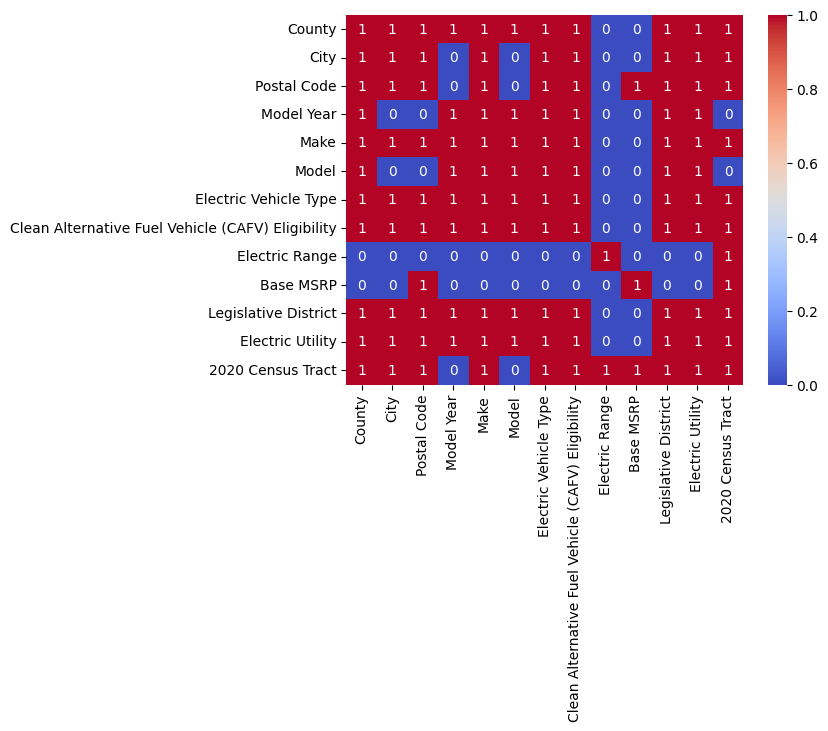

In [93]:
#heatmap analysis for better visualisation of the stastical test results
sns.heatmap(final_df,annot=True,cmap="coolwarm")

In [ ]:
## INFERENCES :
#The data underwent correlation and statistical hypothesis testing
#From these testing we observe that each column has significance over other columns.
#Thus we take forward these columns as such into the Machine learning Paradigm